In [50]:
%matplotlib inline

import os
import time

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from mpl_toolkits.basemap import Basemap

import netCDF4 as nc

from six.moves import urllib # six is for Python 2/3 compatibility

from pycurrents.codas import to_day
from pycurrents.num import rangeslice
from pycurrents.num import eof
# https://currents.soest.hawaii.edu/ocn_data_analysis/installation.html

In [48]:
pinc  = nc.Dataset('var_merged_1850_2314_yrmean.nc')
lat = pinc.variables['lat'][:]                       
lon = pinc.variables['lon'][:]-180
time = pinc.variables['time'][:]
pr = pinc.variables['pr'][:]
tas = pinc.variables['tas'][:]
pr_clim = np.mean(pr,axis=0)

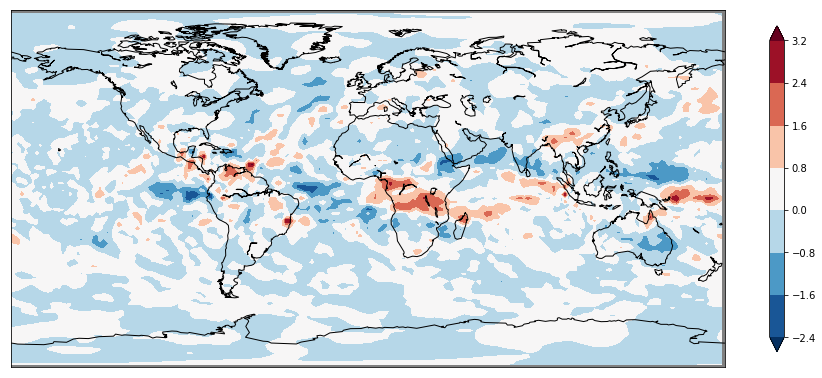

In [49]:
pat = (pr[100]-pr_clim)*86400
cmap = plt.get_cmap('RdBu_r')
cticker = mpl.ticker.MaxNLocator(nbins=40, symmetric=True)
cticker.create_dummy_axis()
mag = pat.std()
cticker.set_bounds(-3*mag, 3*mag)
clevs = cticker()
fig, ax = plt.subplots(figsize=(16, 12))
cs = ax.contourf(lon, lat, (pr[100]-pr_clim)*86400, cmap=cmap, extend='both')
ax.patch.set_facecolor('gray')
fig.colorbar(cs, ax=ax, shrink=0.5)
map = Basemap()
map.drawcoastlines()

ValueError: x and y must have same first dimension, but have shapes (1,) and (464, 94, 192)

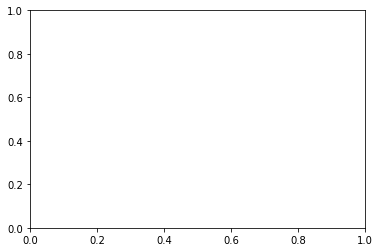